In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
file_nino34='/scratch/kpegion/nino34_1982-2019.oisstv2_anoms.nc'
ds_nino34=xr.open_dataset(file_nino34)
ds_nino34

<xarray.Dataset>
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 ...
Data variables:
    sst      (time) float32 ...

In [4]:
file='/shared/obs/sw/era40/e4moda.an.sfc.t85.swvl1.1957-2002.nc'
ds_soil=xr.open_dataset(file)
ds_soil=ds_soil['SWVL1']*100
ds_soil

<xarray.DataArray 'SWVL1' (time: 540, lat: 128, lon: 256)>
array([[[25.144196, 25.144196, 25.144196, ..., 25.144958, 25.144958,
         25.144958],
        [25.141907, 25.141907, 25.141907, ..., 25.143433, 25.143433,
         25.14267 ],
        [25.135803, 25.134277, 25.131989, ..., 25.141907, 25.14038 ,
         25.138092],
        ...,
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ]],

       [[25.144196, 25.144196, 25.144196, ..., 25.144958, 25.144958,
         25.144958],
        [25.141907, 25.141907, 25.141907, ..., 25.143433, 25.143433,
         25.14267 ],
        [25.135803, 25.134277, 25.131989, ..., 25.141907, 25.14038 ,
         25.138092],
        ...,
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0. 

In [5]:
ds_nino34=ds_nino34.sel(time=slice(ds_nino34['time'][0],ds_soil['time'][-1]))
ds_nino34

<xarray.Dataset>
Dimensions:  (time: 248)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2002-08-01
    month    (time) int64 ...
Data variables:
    sst      (time) float32 ...

In [6]:
ds_soil=ds_soil.sel(time=slice(ds_nino34['time'][0],ds_soil['time'][-1]))
ds_soil

<xarray.DataArray 'SWVL1' (time: 248, lat: 128, lon: 256)>
array([[[ 2.5240326e+01,  2.5239563e+01,  2.5238800e+01, ...,
          2.5244141e+01,  2.5242615e+01,  2.5241852e+01],
        [ 2.5238037e+01,  2.5236511e+01,  2.5234985e+01, ...,
          2.5251007e+01,  2.5246429e+01,  2.5242615e+01],
        [ 2.5190735e+01,  2.5189972e+01,  2.5189972e+01, ...,
          2.5205994e+01,  2.5200653e+01,  2.5195312e+01],
        ...,
        [-2.3699742e-21, -2.3699742e-21, -2.3699742e-21, ...,
         -2.3699742e-21, -2.3699742e-21, -2.3699742e-21],
        [-2.3699742e-21, -2.3699742e-21, -2.3699742e-21, ...,
         -2.3699742e-21, -2.3699742e-21, -2.3699742e-21],
        [-2.3699742e-21, -2.3699742e-21, -2.3699742e-21, ...,
         -2.3699742e-21, -2.3699742e-21, -2.3699742e-21]],

       [[ 2.5214386e+01,  2.5213623e+01,  2.5212860e+01, ...,
          2.5216675e+01,  2.5215912e+01,  2.5215149e+01],
        [ 2.5212097e+01,  2.5211334e+01,  2.5210571e+01, ...,
          2.5222015e+01,

In [7]:
elnino=ds_nino34['sst'].where(ds_nino34['sst']>=1)
lanina=ds_nino34['sst'].where(ds_nino34['sst']<=-1)
neutral=ds_nino34['sst'].where(np.logical_and(ds_nino34['sst']>-1,ds_nino34['sst']<1))

In [8]:
print('El Nino: ',elnino.count(dim='time').values)
print('Neutral: ',neutral.count(dim='time').values)
print('La Nina: ',lanina.count(dim='time').values)

counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        neutral.count(dim='time').values]
print(counts)

El Nino:  39
Neutral:  166
La Nina:  43
[array(39), array(43), array(166)]


In [9]:
ds_climo=ds_soil.groupby('time.month').mean()
ds_anoms=ds_soil.groupby('time.month')-ds_climo
ds_anoms

<xarray.DataArray 'SWVL1' (time: 248, lat: 128, lon: 256)>
array([[[15.881665 , 15.880902 , 15.880139 , ..., 15.88548  ,
         15.883954 , 15.883191 ],
        [15.879376 , 15.877851 , 15.876325 , ..., 15.892346 ,
         15.887769 , 15.883954 ],
        [15.832074 , 15.831311 , 15.831311 , ..., 15.847333 ,
         15.841992 , 15.836652 ],
        ...,
        [-9.358661 , -9.358661 , -9.358661 , ..., -9.358661 ,
         -9.358661 , -9.358661 ],
        [-9.358661 , -9.358661 , -9.358661 , ..., -9.358661 ,
         -9.358661 , -9.358661 ],
        [-9.358661 , -9.358661 , -9.358661 , ..., -9.358661 ,
         -9.358661 , -9.358661 ]],

       [[15.795466 , 15.7947035, 15.793941 , ..., 15.797755 ,
         15.796992 , 15.796229 ],
        [15.793178 , 15.792415 , 15.791652 , ..., 15.803096 ,
         15.800044 , 15.796992 ],
        [15.7565565, 15.7565565, 15.7565565, ..., 15.768764 ,
         15.764949 , 15.760371 ],
        ...,
        [-9.41892  , -9.41892  , -9.41892  , ...,

In [10]:
elnino_soil=ds_anoms.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
lanina_soil=ds_anoms.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
neutral_soil=ds_anoms.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')

comp_soil=[elnino_soil,lanina_soil,neutral_soil]
print(comp_soil)

[<xarray.DataArray 'SWVL1' (lat: 128, lon: 256)>
array([[16.05995  , 16.058971 , 16.057932 , ..., 16.062002 , 16.061337 ,
        16.060652 ],
       [16.034555 , 16.033224 , 16.03166  , ..., 16.041206 , 16.03931  ,
        16.037    ],
       [16.021976 , 16.020765 , 16.019396 , ..., 16.032307 , 16.02902  ,
        16.025324 ],
       ...,
       [-9.1581545, -9.1581545, -9.1581545, ..., -9.1581545, -9.1581545,
        -9.1581545],
       [-9.1581545, -9.1581545, -9.1581545, ..., -9.1581545, -9.1581545,
        -9.1581545],
       [-9.1581545, -9.1581545, -9.1581545, ..., -9.1581545, -9.1581545,
        -9.1581545]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.927734 -87.538704 ... 87.538704 88.927734
  * lon      (lon) float32 0.0 1.406 2.812 4.218 ... 355.718 357.124 358.53, <xarray.DataArray 'SWVL1' (lat: 128, lon: 256)>
array([[16.084087, 16.082968, 16.08219 , ..., 16.086748, 16.085684,
        16.085096],
       [16.047892, 16.046028, 16.0442  , ..., 16.056107, 16.

Text(0.5, 0.98, 'ECMWF ERA-40 Composite Soil Moisture Anomalies during ENSO')

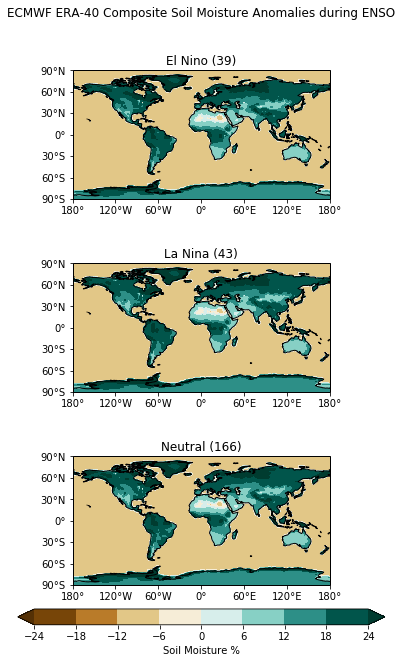

In [15]:
labels=['El Nino','La Nina', 'Neutral']
clevs=np.arange(-24,30,6)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(comp_soil):

        # Select the season
        # data=comp_precip[i]['precip']
        data=comp_soil[i]

        # Add the cyclic point
        # data,lons=add_cyclic_point(data,coord=comp_soil[i]['longitude'])

        # Contour plot
        cs=axs[i].contourf(comp_soil[i]['lon'],comp_soil[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')
      # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Soil Moisture %')

# Add a big title at the top
plt.suptitle('ECMWF ERA-40 Composite Soil Moisture Anomalies during ENSO')

In [16]:
diff_soil=[elnino_soil-neutral_soil, 
             lanina_soil-neutral_soil]

Text(0.5, 0.98, 'ECMWF ERA-40 Composite Soil Moisture Differences during ENSO')

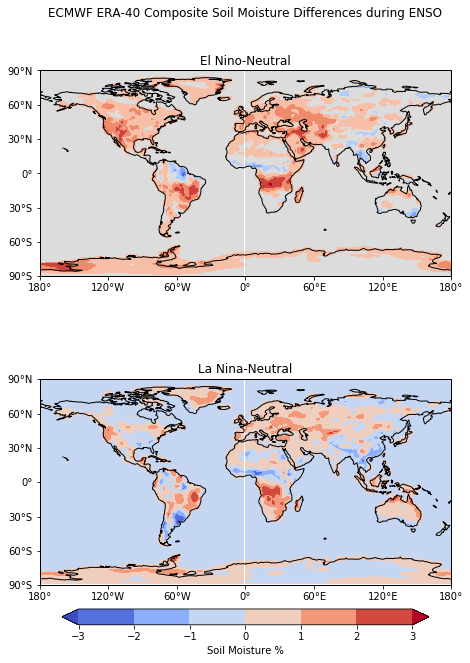

In [17]:
labels=['El Nino-Neutral','La Nina-Neutral']
# clevs=np.arange(-3,3.5,0.5)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(diff_soil):

        # Select the season
        # data=diff_precip[i]['precip']
        data=diff_soil[i]

        # Add the cyclic point
        # data,lons=add_cyclic_point(data,coord=diff_precip[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(diff_soil[i]['lon'],diff_soil[i]['lat'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Soil Moisture %')

# Add a big title at the top
plt.suptitle('ECMWF ERA-40 Composite Soil Moisture Differences during ENSO')

In [18]:
p=0.05
from scipy.stats import ttest_ind

elnino_soil_vals=ds_anoms.sel(time=elnino.dropna(dim='time')['time'])
lanina_soil_vals=ds_anoms.sel(time=lanina.dropna(dim='time')['time'])
neutral_soil_vals=ds_anoms.sel(time=neutral.dropna(dim='time')['time'])

tstat,pval=ttest_ind(elnino_soil_vals, 
                neutral_soil_vals, 
                equal_var = False) # elnino_precip_vals['precip']

In [19]:
mask_diff=diff_soil[0].where(pval<p)
mask_diff

<xarray.DataArray 'SWVL1' (lat: 128, lon: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.927734 -87.538704 ... 87.538704 88.927734
  * lon      (lon) float32 0.0 1.406 2.812 4.218 ... 355.718 357.124 358.53

Text(0.5, 0.98, 'Composite Soil Moisture Differences El Nino-Neutral')

<Figure size 792x612 with 0 Axes>

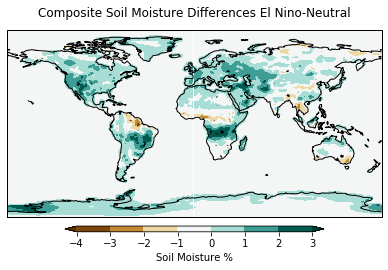

In [20]:
labels=['El Nino-Neutral']
# clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

fig = plt.figure(figsize=(11,8.5))

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()})


# data=diff_precip[0]['precip']
data=diff_soil[0]

# Add the cyclic point
# data,lons=add_cyclic_point(data,coord=diff_precip[0]['lon'])
# mask_data,lons=add_cyclic_point(mask_diff,coord=diff_precip[0]['lon'])

# Contour plot
cs=axs.contourf(diff_soil[0]['lon'],diff_soil[0]['lat'],data,
                    transform = ccrs.PlateCarree(),
                    cmap='BrBG',extend='both')

axs.contourf(diff_soil[0]['lon'],diff_soil[0]['lat'],mask_diff,[0,1],
              transform = ccrs.PlateCarree(),colors='None',
             hatches=['.',''],extend='both',alpha=0)

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Soil Moisture %')

# Add a big title at the top
plt.suptitle('Composite Soil Moisture Differences El Nino-Neutral')
# plt.savefig('stats_ttest.png')